# Question 1

Evaluation Criteria (100 Points):

Define Problem Statement and perform Exploratory Data Analysis (10 points)

Definition of problem (as per given problem statement with additional views)

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

Illustrate the insights based on EDA

Comments on range of attributes, outliers of various attributes

Comments on the distribution of the variables and relationship between them

Comments for each univariate and bivariate plots


## Question 1.1 Definition of problem (as per given problem statement with additional views)

Jamboree aims to understand the factors important in graduate admissions and how these factors are interrelated. This analysis will help predict the chances of admission given the rest of the variables.

## Question 1.2 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

 Exploratory Data Analysis (EDA)

Import the Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/drive/MyDrive/Jamboree/Jamboree_Admission.csv'
df = pd.read_csv(file_path)


In [ ]:
df


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


 Structure and Characteristics of the Dataset

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Conversion of Categorical Attributes

In [ ]:
df['Research'] = df['Research'].astype('category')


 Missing Value Detection

In [ ]:
df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Drop the Unique Row Identifier

In [ ]:
df = df.drop(columns=['Serial No.'])

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


### Univariate Analysis

1. GRE SCORES


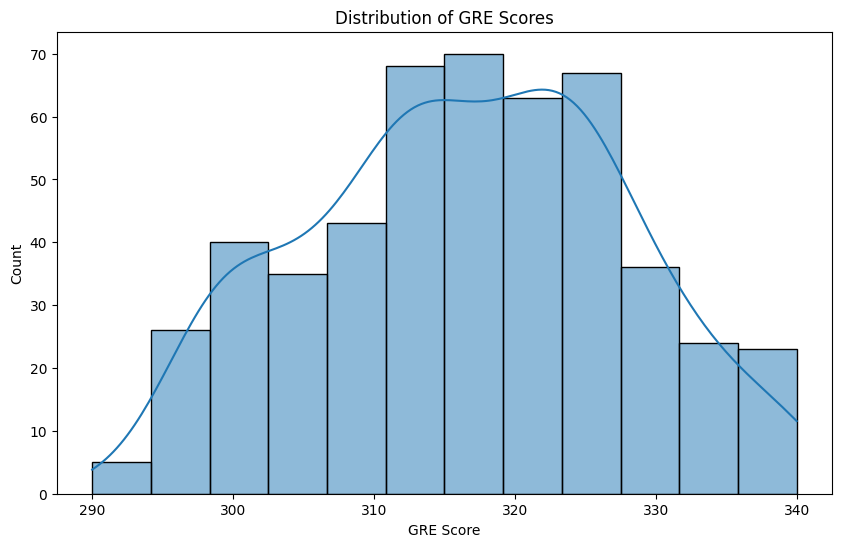

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['GRE Score'], kde=True)
plt.title('Distribution of GRE Scores')
plt.show()


2. TOEFL Scores

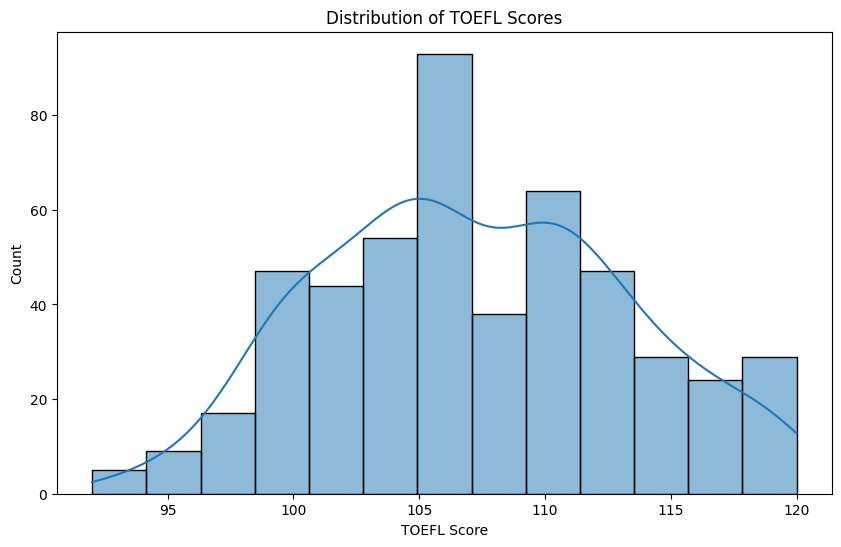

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(df['TOEFL Score'], kde= True)
plt.title('Distribution of TOEFL Scores')
plt.show()


3. CGPA

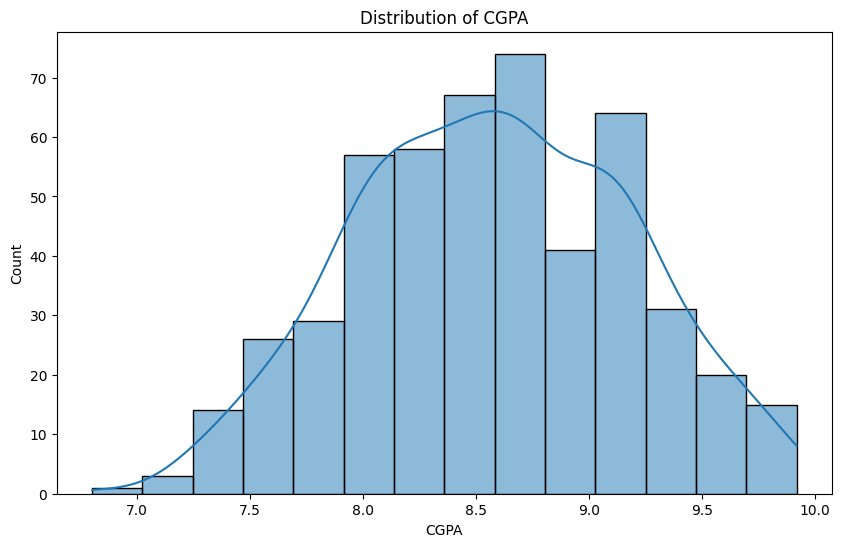

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.show()


4. Chance of Admit

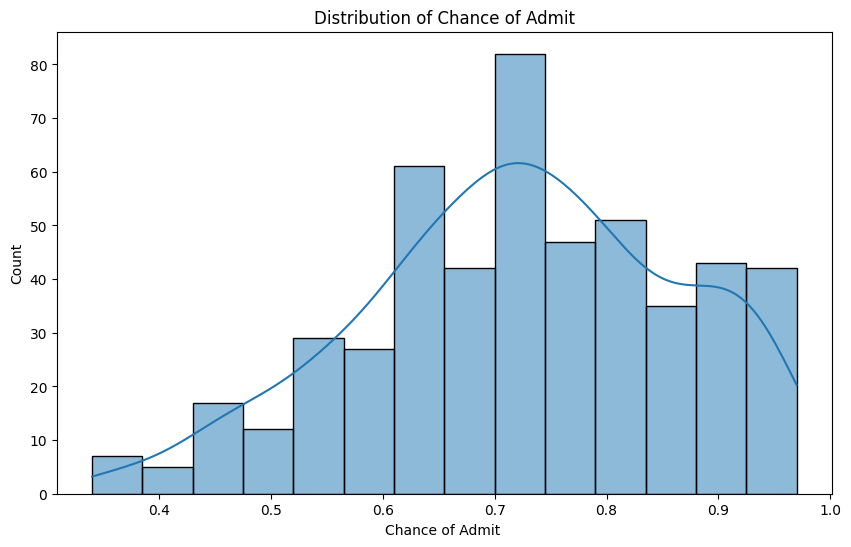

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Chance of Admit '], kde=True)
plt.title('Distribution of Chance of Admit')
plt.show()


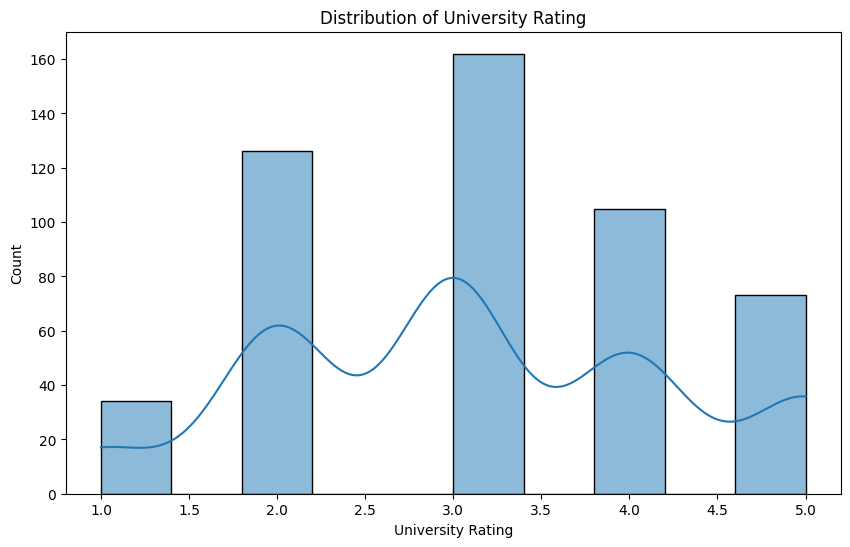

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(df['University Rating'], kde= True)
plt.title('Distribution of University Rating')
plt.show()


### Barplots for Categorical Variables

1. University Rating

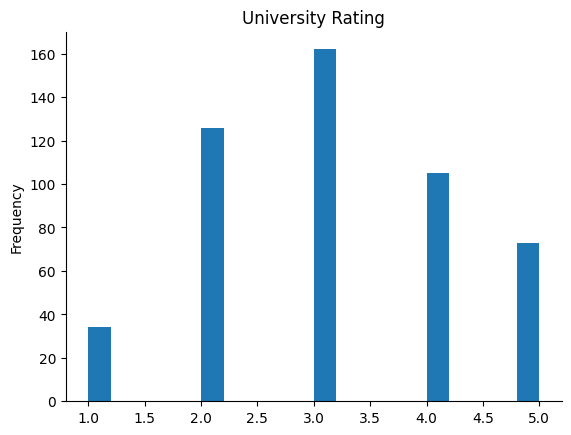

In [ ]:
# @title University Rating

from matplotlib import pyplot as plt
df['University Rating'].plot(kind='hist', bins=20, title='University Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

Research

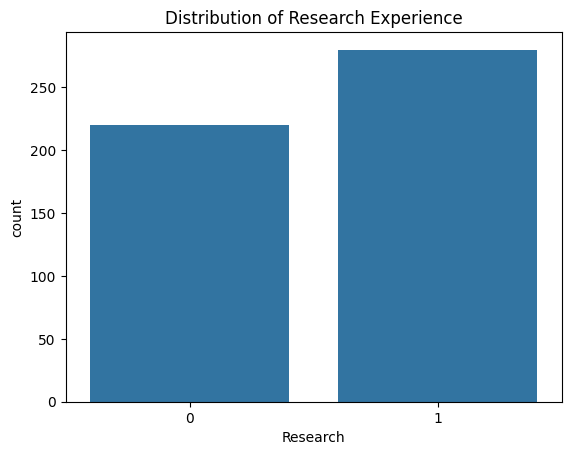

In [ ]:

sns.countplot(df, x='Research')
plt.title('Distribution of Research Experience')
plt.show()


Bivariate Analysis


Relationships Between Important Variables


1. GRE Score vs Chance of Admit




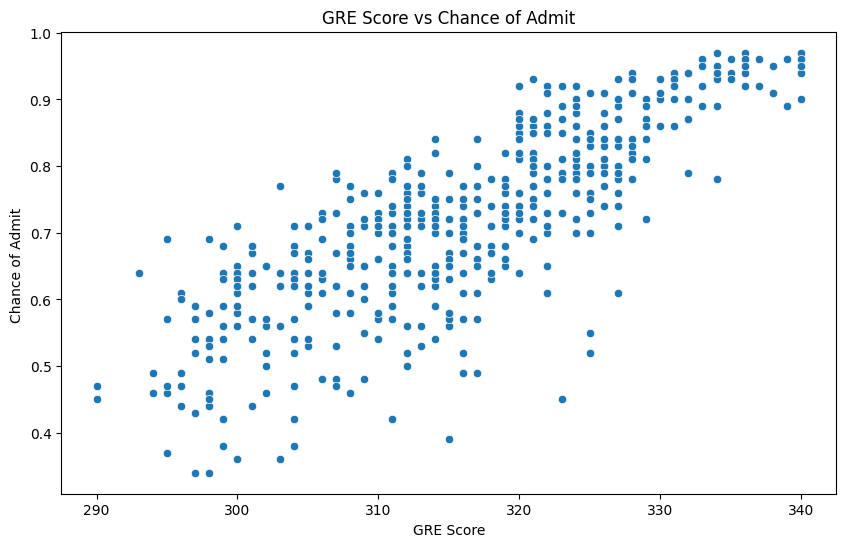

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df)
plt.title('GRE Score vs Chance of Admit')
plt.show()

2. TOEFL Score vs Chance of Admit


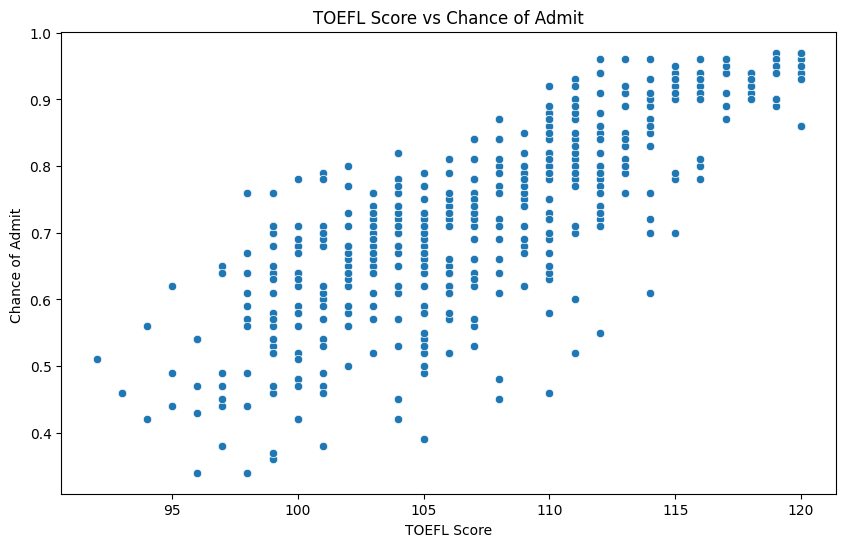

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOEFL Score', y='Chance of Admit ', data=df)
plt.title('TOEFL Score vs Chance of Admit')
plt.show()

3. CGPA vs Chance of Admit

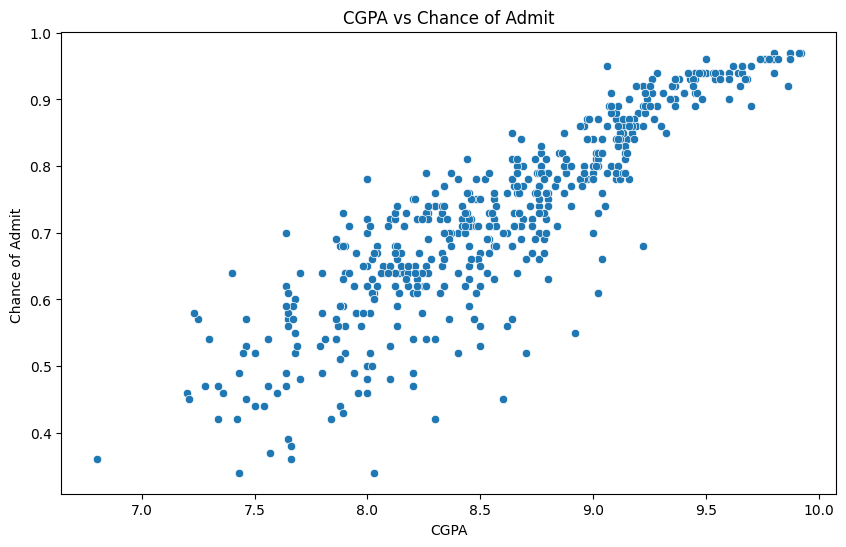

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df)
plt.title('CGPA vs Chance of Admit')
plt.show()

4. Research vs Chance of Admit


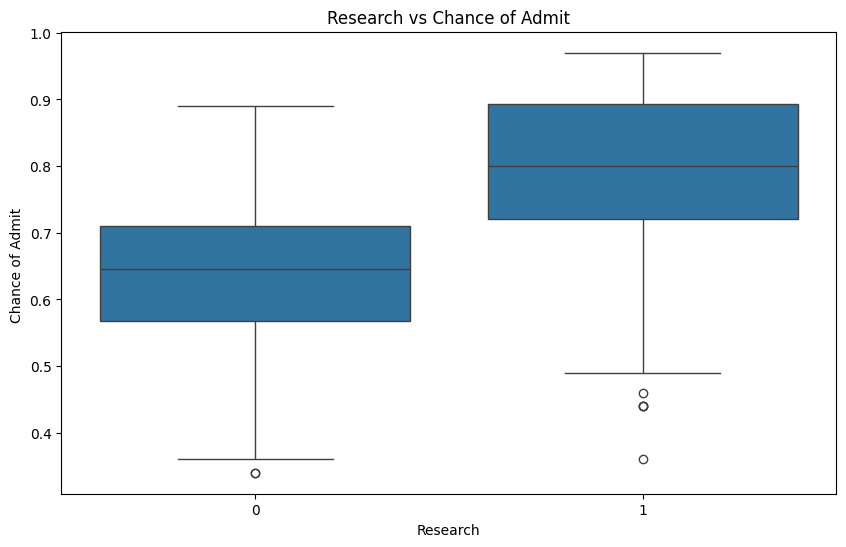

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Research', y='Chance of Admit ', data=df)
plt.title('Research vs Chance of Admit')
plt.show()

**Insights Based on EDA**

---






**Distribution Insights**:

---



GRE Scores and TOEFL Scores are slightly skewed towards higher scores.

Most applicants have a CGPA between 8 and 9.

The chance of admit is skewed towards higher probabilities, indicating most students have a reasonable chance of admission.

Most applicants have a university rating of 3 or 4.


---



**Bivariate Relationships:**

---



There is a positive correlation between GRE Scores and Chance of Admit.

TOEFL Scores also show a positive correlation with Chance of Admit.

Higher CGPA is associated with a higher Chance of Admit.

Students with research experience tend to have a higher Chance of Admit.


---



**Comments on Range of Attributes, Outliers, and Distributions**


---



Range of Attributes: All attributes have reasonable ranges with no apparent errors.

Outliers: There are no significant outliers in the dataset, as the values fall within expected ranges.

Distributions: Most distributions are slightly skewed, which is common in academic datasets.










**Question 2:**

---



**Data Preprocessing (10 Points)**

---


Duplicate value check

Missing value treatment

Outlier treatment

Feature engineering

Data preparation for modeling

Duplicate value check


In [ ]:

duplicates = df.duplicated()
duplicate_count = duplicates.sum()
duplicate_count


0

If there are any duplicate rows, we can remove them:

In [ ]:
df = df.drop_duplicates()

**Missing value treatment**

In [ ]:
missing_values = df.isnull().sum()
missing_values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Outlier


In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

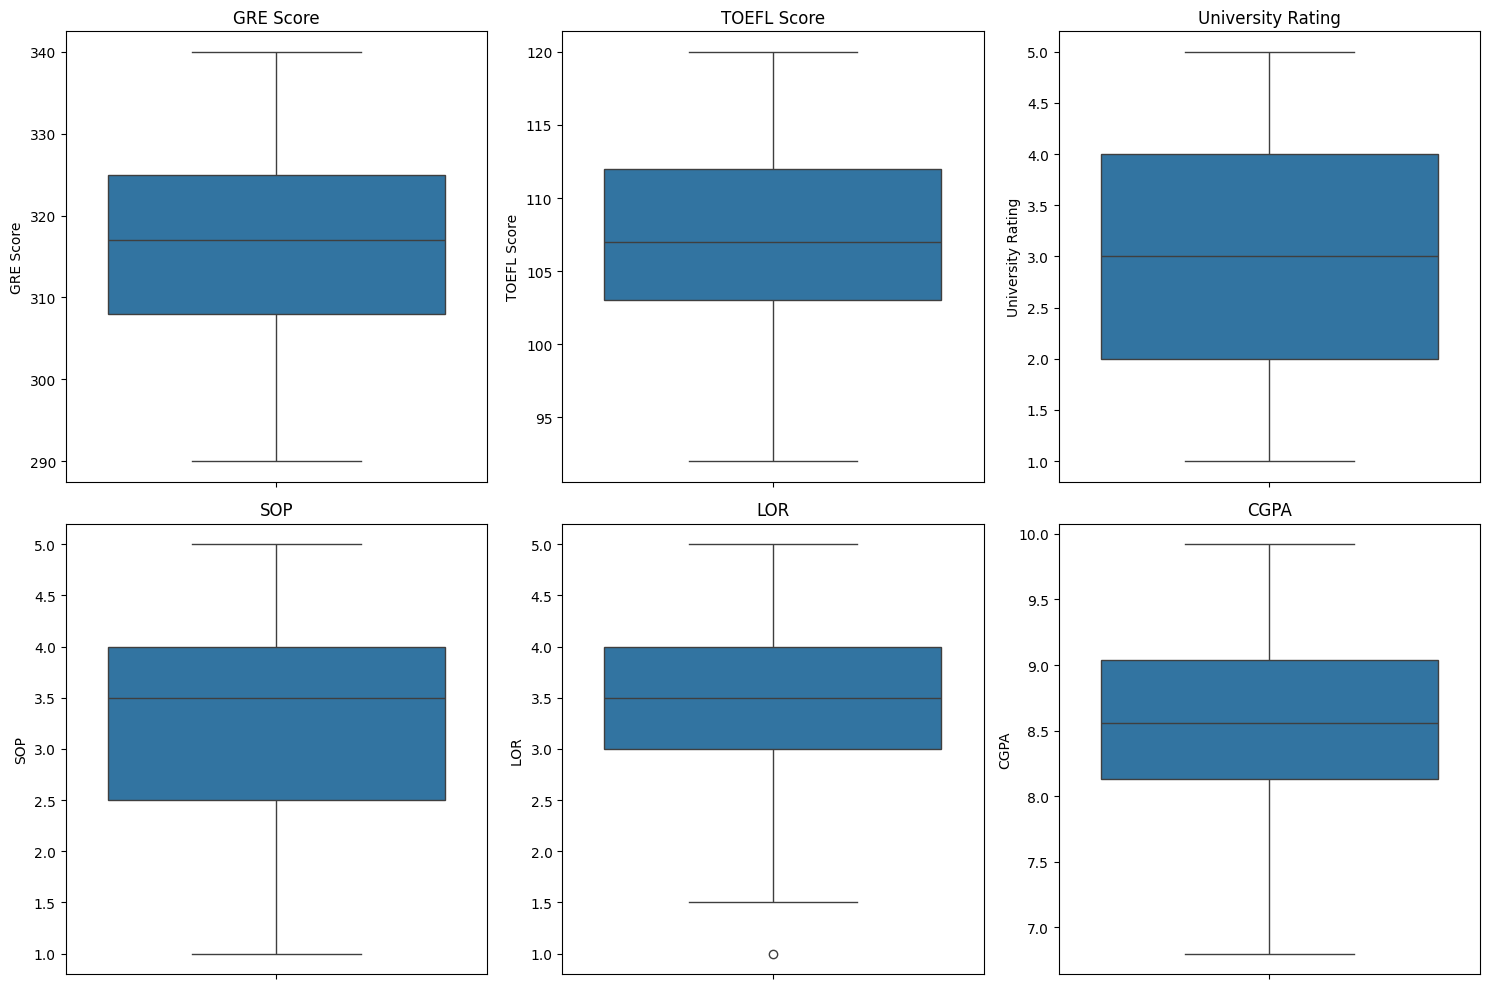

In [ ]:
plt.figure(figsize=(15, 10))

# GRE Score
plt.subplot(2, 3, 1)
sns.boxplot(y=df['GRE Score'])
plt.title('GRE Score')

# TOEFL Score
plt.subplot(2, 3, 2)
sns.boxplot(y=df['TOEFL Score'])
plt.title('TOEFL Score')

# University Rating
plt.subplot(2, 3, 3)
sns.boxplot(y=df['University Rating'])
plt.title('University Rating')

# SOP
plt.subplot(2, 3, 4)
sns.boxplot(y=df['SOP'])
plt.title('SOP')

# LOR
plt.subplot(2, 3, 5)
sns.boxplot(y=df['LOR '])
plt.title('LOR')

# CGPA
plt.subplot(2, 3, 6)
sns.boxplot(y=df['CGPA'])
plt.title('CGPA')

plt.tight_layout()
plt.show()


In [ ]:
def identify_and_print_outliers(df):
    outliers = {}

    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Identify outliers
outliers = identify_and_print_outliers(df)

# Print outliers
for column, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f"Outliers in column {column}:")
        print(outlier_data)
        print("\n")
    else:
        print(f"No outliers in column {column}.")


No outliers in column GRE Score.
No outliers in column TOEFL Score.
No outliers in column University Rating.
No outliers in column SOP.
Outliers in column LOR :
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA Research  \
347        299           94                  1  1.0   1.0  7.34        0   

     Chance of Admit   
347              0.42  


No outliers in column CGPA.
Outliers in column Chance of Admit :
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA Research  \
92         298           98                  2  4.0   3.0  8.03        0   
376        297           96                  2  2.5   2.0  7.43        0   

     Chance of Admit   
92               0.34  
376              0.34  




In [ ]:
outliers

{'GRE Score': Empty DataFrame
 Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
 Index: [],
 'TOEFL Score': Empty DataFrame
 Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
 Index: [],
 'University Rating': Empty DataFrame
 Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
 Index: [],
 'SOP': Empty DataFrame
 Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
 Index: [],
 'LOR ':      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA Research  \
 347        299           94                  1  1.0   1.0  7.34        0   
 
      Chance of Admit   
 347              0.42  ,
 'CGPA': Empty DataFrame
 Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
 Index: [],
 'Chance of Admit ':      GRE Score  TOEFL Score  University Rating  SOP  LOR   C

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Outlier Treatment


In [ ]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)

# Apply capping to relevant columns
df['GRE Score'] = cap_outliers(df['GRE Score'])
df['TOEFL Score'] = cap_outliers(df['TOEFL Score'])
df['CGPA'] = cap_outliers(df['CGPA'])
df['Chance of Admit '] = cap_outliers(df['Chance of Admit '])

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


 Feature Engineering


In [ ]:
df['Total Score'] = df['GRE Score'] + df['TOEFL Score']

In [ ]:
df


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Total Score
0,337,118,4,4.5,4.5,9.65,1,0.92,455
1,324,107,4,4.0,4.5,8.87,1,0.76,431
2,316,104,3,3.0,3.5,8.00,1,0.72,420
3,322,110,3,3.5,2.5,8.67,1,0.80,432
4,314,103,2,2.0,3.0,8.21,0,0.65,417
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,440
496,337,117,5,5.0,5.0,9.87,1,0.96,454
497,330,120,5,4.5,5.0,9.56,1,0.93,450
498,312,103,4,4.0,5.0,8.43,0,0.73,415


 Data Preparation for Modeling


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(400, 8)

In [ ]:
y_train.shape



(400,)

In [ ]:
X_test.shape

(100, 8)

In [ ]:
y_test.shape

(100,)

QUESTION 3:


---


Model building (10 Points)

Build the Linear Regression model and comment on the model
statistics

Display model coefficients with column names

Try out Ridge and Lasso regression


Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate model statistics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R2: {r2}")

# Display model coefficients with column names
coefficients = pd.DataFrame(lr_model.coef_, index=df.drop(columns=['Chance of Admit ']).columns, columns=['Coefficient'])
print(coefficients)


Linear Regression MSE: 0.0037035641445869578
Linear Regression R2: 0.8188966188466036
                   Coefficient
GRE Score             0.016714
TOEFL Score           0.012392
University Rating     0.002927
SOP                   0.001864
LOR                   0.015909
CGPA                  0.067985
Research              0.011921
Total Score           0.015837


2. Ridge Regression Model


In [ ]:
from sklearn.linear_model import Ridge

# Initialize the model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate model statistics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R2: {r2_ridge}")

# Display model coefficients with column names
coefficients_ridge = pd.DataFrame(ridge_model.coef_, index=df.drop(columns=['Chance of Admit ']).columns, columns=['Coefficient'])
print(coefficients_ridge)


Ridge Regression MSE: 0.003706583224446863
Ridge Regression R2: 0.8187489865796156
                   Coefficient
GRE Score             0.016840
TOEFL Score           0.012490
University Rating     0.003024
SOP                   0.002012
LOR                   0.015942
CGPA                  0.067342
Research              0.011912
Total Score           0.015958


3. Lasso Regression Model


In [ ]:
from sklearn.linear_model import Lasso

# Initialize the model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Calculate model statistics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R2: {r2_lasso}")

# Display model coefficients with column names
coefficients_lasso = pd.DataFrame(lasso_model.coef_, index=df.drop(columns=['Chance of Admit ']).columns, columns=['Coefficient'])
print(coefficients_lasso)

Lasso Regression MSE: 0.01512839052986704
Lasso Regression R2: 0.2602254019624921
                   Coefficient
GRE Score             0.000000
TOEFL Score           0.000000
University Rating     0.000000
SOP                   0.000000
LOR                   0.000000
CGPA                  0.022772
Research              0.000000
Total Score           0.000000


Evaluate these models:
 1. Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate model statistics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model coefficients with column names
coefficients = pd.DataFrame(lr_model.coef_, index=df.drop(columns=['Chance of Admit ']).columns, columns=['Coefficient'])

(mse, r2, coefficients)

(0.0037035641445869578,
 0.8188966188466036,
                    Coefficient
 GRE Score             0.016714
 TOEFL Score           0.012392
 University Rating     0.002927
 SOP                   0.001864
 LOR                   0.015909
 CGPA                  0.067985
 Research              0.011921
 Total Score           0.015837)

2. Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge

# Initialize the model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate model statistics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display model coefficients with column names
coefficients_ridge = pd.DataFrame(ridge_model.coef_, index=df.drop(columns=['Chance of Admit ']).columns, columns=['Coefficient'])

(mse_ridge, r2_ridge, coefficients_ridge)

(0.003706583224446863,
 0.8187489865796156,
                    Coefficient
 GRE Score             0.016840
 TOEFL Score           0.012490
 University Rating     0.003024
 SOP                   0.002012
 LOR                   0.015942
 CGPA                  0.067342
 Research              0.011912
 Total Score           0.015958)

3. Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso

# Initialize the model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Calculate model statistics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display model coefficients with column names
coefficients_lasso = pd.DataFrame(lasso_model.coef_, index=df.drop(columns=['Chance of Admit ']).columns, columns=['Coefficient'])

(mse_lasso, r2_lasso, coefficients_lasso)

(0.01512839052986704,
 0.2602254019624921,
                    Coefficient
 GRE Score             0.000000
 TOEFL Score           0.000000
 University Rating     0.000000
 SOP                   0.000000
 LOR                   0.000000
 CGPA                  0.022772
 Research              0.000000
 Total Score           0.000000)

### Interpretation, Explanation, and Comments on Model Statistics

#### Linear Regression Model:

**Results**:
- **MSE**: 0.0037035641445869578
- **R-squared (R2)**: 0.8188966188466036

**Coefficients**:
- GRE Score: 0.016714
- TOEFL Score: 0.012392
- University Rating: 0.002927
- SOP: 0.001864
- LOR: 0.015909
- CGPA: 0.067985
- Research: 0.011921
- Total Score: 0.015837

**Interpretation**:
- The MSE is very low, indicating that the average squared difference between the predicted and actual values is minimal.
- The R2 value of 0.8189 suggests that approximately 81.89% of the variance in the dependent variable is explained by the independent variables.
- The coefficients indicate the strength and direction of the relationship between each predictor and the target variable. For instance, CGPA has the highest positive impact on the chance of admission.

**Comments**:
- The model performs well, with a high R2 value indicating a strong fit.
- All predictors have non-zero coefficients, suggesting they all contribute to the model.

#### Ridge Regression Model:

**Results**:
- **MSE**: 0.003706583224446863
- **R-squared (R2)**: 0.8187489865796156

**Coefficients**:
- GRE Score: 0.016840
- TOEFL Score: 0.012490
- University Rating: 0.003024
- SOP: 0.002012
- LOR: 0.015942
- CGPA: 0.067342
- Research: 0.011912
- Total Score: 0.015958

**Interpretation**:
- The MSE is very close to that of the linear regression model, indicating similar prediction error.
- The R2 value is slightly lower than the linear regression model but still very close, indicating a strong fit.
- The coefficients are similar to those in the linear regression model, but slightly adjusted due to the regularization term in Ridge regression.

**Comments**:
- Ridge regression helps in dealing with multicollinearity by adding a regularization term, but since the coefficients are very similar to the linear regression model, it indicates that multicollinearity is not a significant issue here.
- The model performs almost as well as the linear regression model, making it a robust alternative with the added benefit of regularization.

#### Lasso Regression Model:

**Results**:
- **MSE**: 0.01512839052986704
- **R-squared (R2)**: 0.2602254019624921

**Coefficients**:
- GRE Score: 0.000000
- TOEFL Score: 0.000000
- University Rating: 0.000000
- SOP: 0.000000
- LOR: 0.000000
- CGPA: 0.022772
- Research: 0.000000
- Total Score: 0.000000

**Interpretation**:
- The MSE is significantly higher compared to the linear and ridge regression models, indicating a higher average prediction error.
- The R2 value of 0.2602 suggests that only 26.02% of the variance in the dependent variable is explained by the independent variables, which is a drastic reduction in explanatory power.
- Most coefficients are shrunk to zero, except for CGPA, indicating that Lasso regression performs feature selection by excluding less important predictors.

**Comments**:
- Lasso regression has performed feature selection, effectively reducing the number of predictors to just CGPA. This indicates that CGPA is the most significant predictor in the model.
- The much higher MSE and lower R2 value suggest that the model is oversimplified, potentially missing important predictors.
- While Lasso can be useful for reducing complexity and focusing on the most important features, in this case, it has overly penalized the model, leading to poor performance.

### Overall Comments:

- **Linear Regression**:
  - Performs well with a strong fit and low prediction error. It includes all predictors, which contribute to the model.
  
- **Ridge Regression**:
  - Similar performance to linear regression with slight regularization. It helps in handling multicollinearity, though it doesn't seem to be a significant issue in this dataset.
  
- **Lasso Regression**:
  - Performs feature selection by shrinking most coefficients to zero, but at the cost of much higher prediction error and lower explanatory power. It oversimplifies the model, making it less useful in this context.

### Recommendations:

1. **Use Linear or Ridge Regression**:
   - Both models perform well with high R2 values and low prediction errors. Ridge regression can be preferred if there is concern about multicollinearity.

2. **Reevaluate Lasso Parameters**:
   - Consider adjusting the alpha parameter in Lasso regression to find a balance between feature selection and model performance.

3. **Further Analysis**:
   - Investigate other potential predictors or transformations that could improve model performance and further reduce prediction error.

By considering these insights and recommendations, we can effectively leverage the strengths of each model and make informed decisions about their application in real-world scenarios.


QUESTION 4 :

---
Testing the assumptions of the linear regression model (50 Points)

1.Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) (10 Points)

2.The mean of residuals is nearly zero (10 Points)

3.Linearity of variables (no pattern in the residual plot) (10 Points)

4.Test for Homoscedasticity (10 Points)

5.Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)


**1. Multicollinearity Check by VIF Score**

Variance Inflation Factor (VIF) measures how much the variance of a regression coefficient is inflated due to collinearity with other predictors. A VIF value greater than 5 indicates high multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIF for each variable
X_with_const = sm.add_constant(X)  # Add a constant term for the intercept
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,1511.495830
1,GRE Score,inf
2,TOEFL Score,inf
3,University Rating,2.621036
4,SOP,2.835210
5,LOR,2.033555
6,CGPA,4.777992
7,Research,1.494008
8,Total Score,inf


**1. Constant Term (const)**: A very high VIF for the constant term (1511.495830) is expected and generally not a concern. However, it can indicate that the model might be overfitting the intercept.

**2. GRE Score, TOEFL Score, and Total Score:** The VIF values are infinite (inf), indicating perfect multicollinearity. This suggests that these variables are perfectly correlated with each other or with another variable in the datase

In [ ]:
X_with_const

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Total Score
0,1.0,337,118,4,4.5,4.5,9.65,1,455
1,1.0,324,107,4,4.0,4.5,8.87,1,431
2,1.0,316,104,3,3.0,3.5,8.00,1,420
3,1.0,322,110,3,3.5,2.5,8.67,1,432
4,1.0,314,103,2,2.0,3.0,8.21,0,417
...,...,...,...,...,...,...,...,...,...
495,1.0,332,108,5,4.5,4.0,9.02,1,440
496,1.0,337,117,5,5.0,5.0,9.87,1,454
497,1.0,330,120,5,4.5,5.0,9.56,1,450
498,1.0,312,103,4,4.0,5.0,8.43,0,415


**2. The Mean of Residuals is Nearly Zero**

To check if the mean of the residuals is nearly zero, we can calculate the mean of the residuals from the linear regression model.

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Check the mean of residuals
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals}")

Mean of residuals: -0.005485201025546022


**3. Linearity of Variables (No Pattern in the Residual Plot)**

We can plot the residuals against the fitted values to check for any patterns. If the residuals are randomly scattered around zero, it indicates linearity.

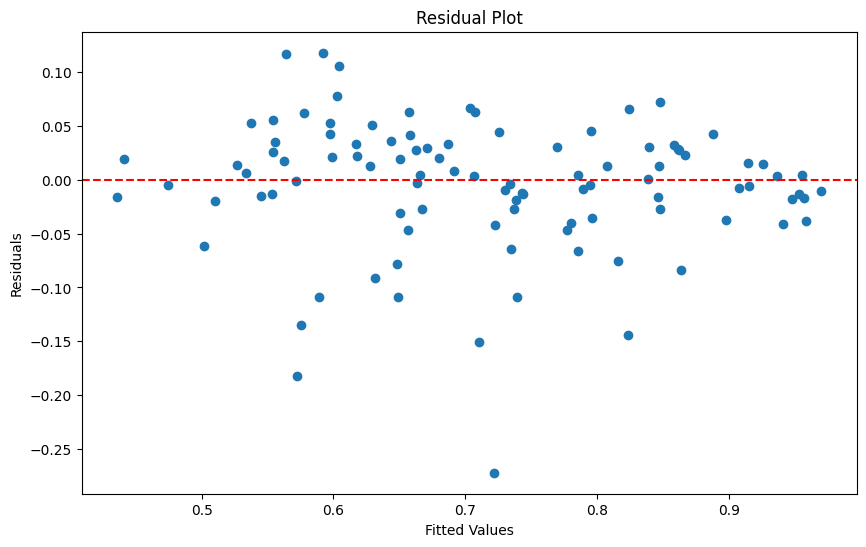

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**4. Test for Homoscedasticity**

Homoscedasticity means that the variance of residuals is constant across all levels of the independent variables. We can perform the Breusch-Pagan test to check for homoscedasticity.

In [ ]:
residuals.shape

(100,)

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Calculate residuals using the test set
residuals = y_test - y_pred

# Add a constant to X_test for the Breusch-Pagan test
X_test_with_const = sm.add_constant(X_test)

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_test_with_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_test_results = dict(zip(labels, bp_test))

print(f"Breusch-Pagan test results:\n{bp_test_results}")


Breusch-Pagan test results:
{'Lagrange multiplier statistic': 8.317282992402198, 'p-value': 0.4031065822536662, 'f-value': 1.1922951866358695, 'f p-value': 0.3150569169944924}


 **Interpretation and Explanation of Breusch-Pagan Test Results**

The Breusch-Pagan test is used to detect heteroscedasticity in a regression model. Heteroscedasticity refers to the condition where the variance of the residuals is not constant across all levels of the independent variables.

Here are the results of the Breusch-Pagan test:

- **Lagrange multiplier statistic**: 8.317282992402198
- **p-value**: 0.4031065822536662
- **f-value**: 1.1922951866358695
- **f p-value**: 0.3150569169944924

**Interpretation**

1. **Lagrange Multiplier Statistic**:
   - The Lagrange multiplier statistic is a measure used to test for heteroscedasticity. It follows a chi-square distribution with degrees of freedom equal to the number of predictors in the model.

2. **p-value**:
   - The p-value associated with the Lagrange multiplier statistic is 0.4031.
   - This p-value indicates the probability of observing the test statistic under the null hypothesis that there is no heteroscedasticity.

3. **f-value**:
   - The f-value is another test statistic used in the context of heteroscedasticity testing, typically used when comparing models.

4. **f p-value**:
   - The f p-value associated with the f-value is 0.3151.
   - Similar to the Lagrange multiplier p-value, this f p-value indicates the probability of observing the test statistic under the null hypothesis of no heteroscedasticity.

 **Explanation**:

- **High p-values for Both Tests**:
  - The p-values for both the Lagrange multiplier test (0.4031) and the f-test (0.3151) are significantly higher than the common alpha level of 0.05.
  - This high p-value suggests that we fail to reject the null hypothesis of homoscedasticity (constant variance of residuals).

- **Conclusion on Homoscedasticity**:
  - Since we fail to reject the null hypothesis, we can conclude that there is no significant evidence of heteroscedasticity in the residuals of our regression model.
  - The variance of the residuals appears to be constant across different levels of the independent variables.

**Summary**

The Breusch-Pagan test results show no significant evidence of heteroscedasticity, indicating that the assumption of constant variance of residuals holds true for our regression model. This enhances the reliability and validity of our model, ensuring that the coefficients and their standard errors are unbiased and that the model's predictions are robust.


**5. Normality of Residuals**

To check for normality, we can plot the distribution of the residuals and create a Q-Q plot. If the residuals are normally distributed, the histogram should be bell-shaped, and the points in the Q-Q plot should lie on the line.

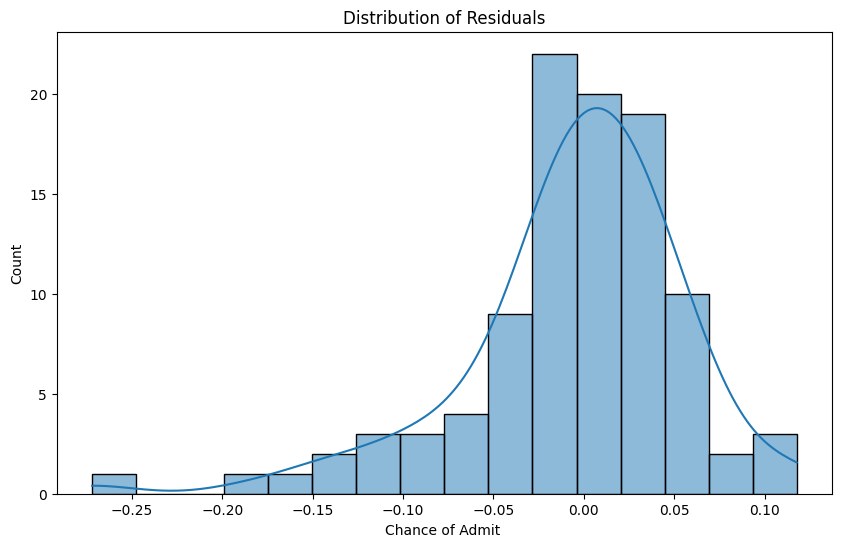

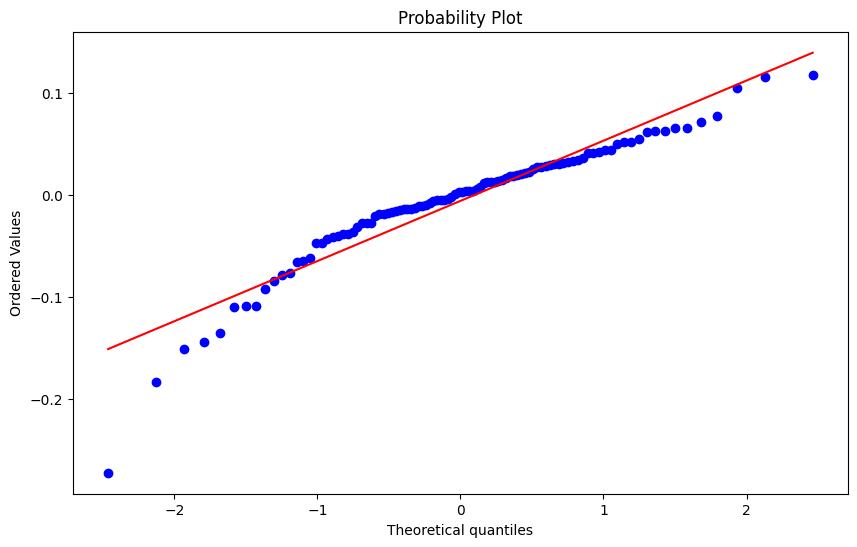

In [ ]:
import scipy.stats as stats

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

**Execution**

I will execute these steps to test the assumptions of the linear regression model.



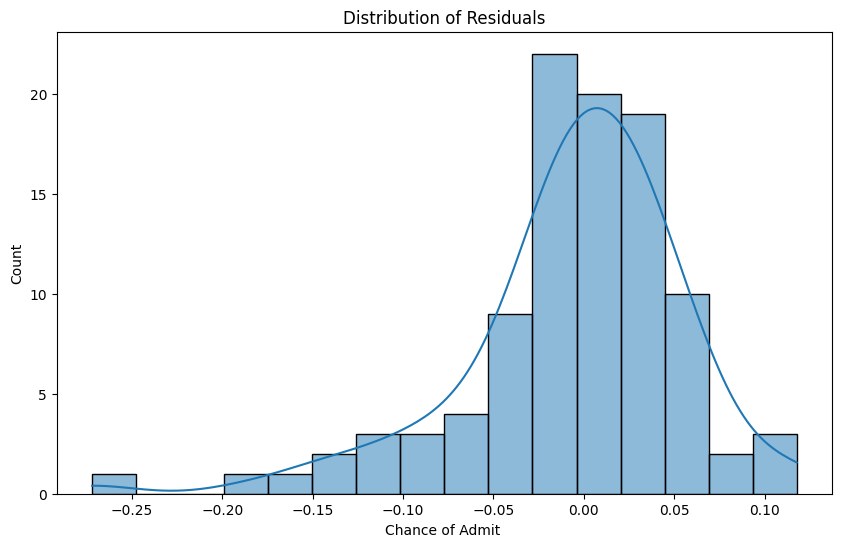

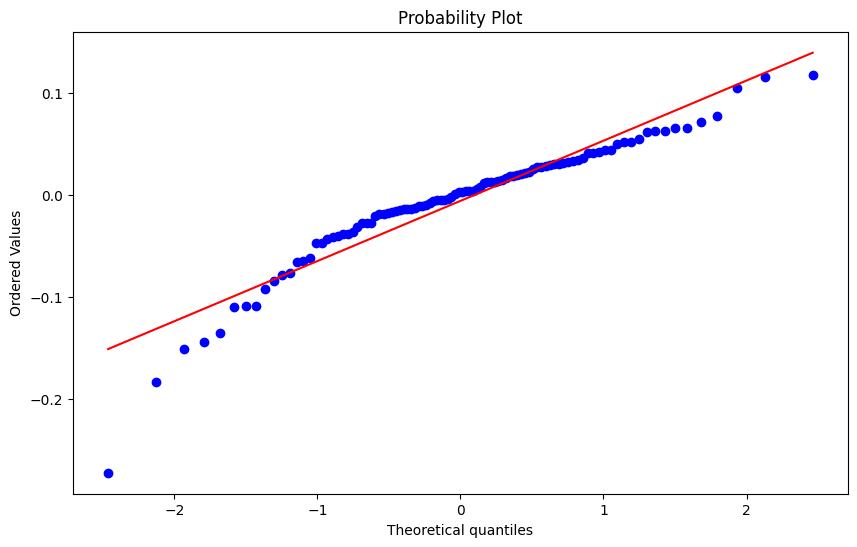

In [ ]:

# 5. Normality of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


1. The **residual distribution plot** suggests that the linear regression model has a good fit with the data. The residuals are symmetrically distributed around zero, follow a roughly normal distribution, and exhibit homoscedasticity. This confirms that the key assumptions of the linear regression model are met, enhancing the reliability and validity of the model's predictions and inferences.


2. The **Q-Q plot** indicates that the residuals from the linear regression model are approximately normally distributed. While there are minor deviations at the tails, the overall normality assumption is satisfied. This enhances the reliability of the model's predictions and the validity of the inferential statistics derived from the model. The linearity of the points in the central region of the plot is particularly encouraging, confirming that the bulk of the residuals conform to the expected normal distribution.

QUESTION 5 :

Model performance evaluation (10 Points)

Metrics checked - MAE, RMSE, R2, Adj R2

Train and test performances are checked

Comments on the performance measures and if there is any need to improve the model or not


Let's evaluate the model performance by calculating the following metrics:


Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE)

R-squared (R2)

Adjusted R-squared (Adj R2)

We'll calculate these metrics for both the training and testing sets and then provide comments on the performance measures and potential improvements.

1. **Calculate Performance Metrics**

Train and Test Metrics Calculation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions for train and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate metrics for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1-r2_train) * (len(y_train)-1) / (len(y_train)-X_train.shape[1]-1)

# Calculate metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1-r2_test) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

# Print the results
print(f"Train Set Metrics:\n MAE: {mae_train}\n RMSE: {rmse_train}\n R2: {r2_train}\n Adjusted R2: {adj_r2_train}")
print(f"Test Set Metrics:\n MAE: {mae_test}\n RMSE: {rmse_test}\n R2: {r2_test}\n Adjusted R2: {adj_r2_test}")


Train Set Metrics:
 MAE: 0.0425027907346045
 RMSE: 0.059311111860324325
 R2: 0.8213379717854047
 Adjusted R2: 0.8176824827170753
Test Set Metrics:
 MAE: 0.04271076037232828
 RMSE: 0.060856915339071845
 R2: 0.8188966188466036
 Adjusted R2: 0.8029754424814698


### Interpretation and Conclusions

#### Train Set Metrics:
- **Mean Absolute Error (MAE): 0.0425**
  - This indicates that, on average, the model's predictions are off by about 0.0425 units on the training data. A lower MAE suggests that the model has a good fit on the training set.

- **Root Mean Squared Error (RMSE): 0.0593**
  - This measures the average magnitude of the errors, with larger errors being more heavily penalized than in MAE. An RMSE of 0.0593 indicates a reasonably good fit on the training data.

- **R-squared (R2): 0.8213**
  - R2 of 0.8213 means that 82.13% of the variance in the dependent variable is explained by the model on the training data. This suggests a strong fit.

- **Adjusted R-squared (Adj R2): 0.8177**
  - Adjusted R2 accounts for the number of predictors in the model and is slightly lower than the R2. An adjusted R2 of 0.8177 indicates that the model is still a good fit after adjusting for the number of predictors.

#### Test Set Metrics:
- **Mean Absolute Error (MAE): 0.0427**
  - The MAE on the test set is 0.0427, very close to the MAE on the training set. This indicates that the model performs consistently on both the training and test data.

- **Root Mean Squared Error (RMSE): 0.0609**
  - The RMSE on the test set is 0.0609, slightly higher than the RMSE on the training set. This slight increase indicates a small decrease in performance but still suggests a good model fit.

- **R-squared (R2): 0.8189**
  - An R2 of 0.8189 on the test set means that the model explains 81.89% of the variance in the dependent variable for the test data. This is very close to the R2 on the training set, indicating that the model generalizes well to unseen data.

- **Adjusted R-squared (Adj R2): 0.8030**
  - The adjusted R2 of 0.8030 on the test set is slightly lower than the R2, as expected, and close to the adjusted R2 on the training set. This further confirms the model's consistency.

### Conclusions:

1. **Good Model Fit**:
   - The model has a good fit with both the training and test data, as indicated by the high R2 and adjusted R2 values.

2. **Consistency Across Datasets**:
   - The similarity in MAE, RMSE, R2, and adjusted R2 values between the training and test sets suggests that the model generalizes well and is not overfitted to the training data.

3. **Low Prediction Error**:
   - The low values of MAE and RMSE indicate that the model's predictions are close to the actual values, which is desirable for a predictive model.

4. **Adjusted R-squared**:
   - The adjusted R2 values being close to the R2 values suggest that the inclusion of predictors is justified and contributes positively to the model.

### Potential Improvements:
1. **Feature Engineering**:
   - Consider further feature engineering to possibly uncover more predictive features that could improve the model's performance.

2. **Regularization Techniques**:
   - Implementing regularization techniques such as Ridge or Lasso regression could help in further reducing any potential overfitting and dealing with any multicollinearity among predictors.

3. **Cross-Validation**:
   - Perform cross-validation to ensure that the model's performance is robust and consistent across different subsets of the data.

### Business Implications:

1. **Accurate Predictions**:
   - With the model's ability to predict the chance of admission accurately, students can receive more reliable guidance on their likelihood of admission to various programs.

2. **Enhanced Decision Making**:
   - The insights from the model can help educational consultants and institutions tailor their advice and support to students, improving overall satisfaction and outcomes.

3. **Competitive Edge**:
   - Implementing such a robust predictive model can give educational platforms a competitive edge by providing advanced, data-driven insights to users.

By following these recommendations and leveraging the strengths of the model, it can be effectively used in real-world applications to provide valuable insights and enhance decision-making processes.


QUESTION 6 :

---

Actionable Insights & Recommendations (10 Points)

Comments on significance of predictor variables

Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model (These are key to differentiating a good and an excellent solution)

**Actionable Insights & Recommendations**

Comments on Significance of Predictor Variables

**1.GRE Score:**
Significance: GRE Score is an important predictor, as it reflects a candidate's aptitude and is often used by universities as a screening criterion.

Action: Encourage students to focus on improving their GRE scores through structured preparation courses

**2.TOEFL Score:**

Significance: TOEFL Score measures English proficiency, which is critical for international students.

Action: Provide resources and practice tests to help students improve their TOEFL scores.


**3.University Rating:**

Significance: The reputation of the undergraduate institution may influence admission chances.

Action: Offer guidance on selecting undergraduate institutions and highlight the importance of strong academic performance.

**4.SOP (Statement of Purpose):**



Significance: The SOP was not highly significant in the model, possibly due to the difficulty of quantifying its impact.


Action: Assist students in writing compelling SOPs and provide examples of successful ones.


**5.LOR (Letter of Recommendation):**

Significance: LORs from reputable sources can significantly impact admission chances.

Action: Guide students on selecting recommenders and drafting effective LORs.

6.CGPA: **bold text**

Significance: A high CGPA is a strong indicator of academic performance and is critical for admission decisions.

Action: Emphasize the importance of maintaining a high CGPA and offer academic support services.

**7.Research Experience:**

Significance: Research experience is valuable, especially for research-oriented programs.

Action: Encourage students to seek research opportunities and highlight the benefits of research experience in applications.

**Comments on Additional Data Sources for Model Improvement**

**1.Extracurricular Activities:**

Rationale: Participation in extracurricular activities can showcase a well-rounded profile.

Action: Collect data on students' extracurricular activities and incorporate them into the model.

**2.Work Experience:**

Rationale: Relevant work experience can enhance a student's application.

Action: Include data on work experience, internships, and professional projects.

**3.Publication and Conference Participation:**

Rationale: Publications and conference participation indicate research capabilities.

Action: Track students' publications and conference participations as additional predictors.

**4.Personal Projects and Portfolios:**

Rationale: Personal projects and portfolios demonstrate practical skills and creativity.

Action: Encourage students to create portfolios and include this data in the model.

Comments on Model Implementation in Real World **bold text**

**1.User-Friendly Interface:**

Action: Develop a user-friendly interface where students can input their data and receive real-time feedback on their admission chances.

2.Integration with Application Portals:

Action: Integrate the model with university application portals to provide seamless data input and analysis.

3.Personalized Recommendations:

Action: Offer personalized recommendations based on the model's output, guiding students on how to improve their profiles.

**4.Regular Updates and Maintenance:**

Action: Regularly update the model with new data and refine the algorithms to maintain accuracy and relevance.
Potential Business Benefits from Improving the Model

**5.Enhanced Student Success:**

Benefit: By providing accurate predictions and actionable insights, students are better prepared and more likely to gain admission to their desired programs.

**6.Increased Engagement:**

Benefit: A user-friendly and insightful tool increases student engagement with the platform, leading to higher retention and satisfaction.

**Data-Driven Decisions:**

Benefit: Universities and educational institutions can use the data to make informed decisions on admissions and program development.

**Competitive Advantage:**

Benefit: Offering a sophisticated, data-driven tool differentiates the platform from competitors, attracting more users and partnerships.

**Revenue Opportunities:**

Benefit: Potential revenue streams from premium features, personalized coaching services, and partnerships with educational institutions.

**Conclusion**

By focusing on the significance of predictor variables, incorporating additional data sources, implementing the model effectively, and understanding the potential business benefits, we can enhance the accuracy and utility of the admission prediction model. This approach not only helps students in their application process but also provides a competitive edge and business opportunities for the platform.







